# Import libraries

In [1]:
from skimage.io import imread
from skimage import img_as_float 
from skimage.color import rgb2gray
from skimage.util import pad
from skimage.util import random_noise

import numpy as np

from scipy import signal

import matplotlib.pyplot as plt

# Helper functions

In [9]:
# 5*5 inches
# If shape = 2 then grayscale else color image
def plot_image(img,figsize=(5,5)):
    plt.figure(figsize=figsize)
    if len(img.shape)==2:
        plt.imshow(img, cmap="gray")
    else:
        plt.imshow(img)
    plt.axis("off")
    plt.show()
    print("Image shape: ", img.shape)

# Showing kernel as image (color map as Reds) more intensity more dark
# Normally kernel are odd size like 3*3
def plot_kernel(kernel, cmap="Reds"):
    plt.imshow(kernel, interpolation='none', cmap="Reds")
    plt.colorbar()
    plt.show()
    print("Kernel shape: ", kernel.shape)

# Same values in 3*3 cell. E.g. to normalize = x / (9*v)
# Needed in blurring. (for noisy image)
def box_kernel(size=5):
    return np.ones((size, size))/size**2

In [15]:
# 2D Gaussian kernel
# mew = midpoint
# interval = sigma square
# A weighted average (more spread)
# More sigma more spread
# At center, more intensity
def gaussian2D(size, sigma):
  x = np.linspace(0, size, size)
  y = np.linspace(0, size, size)
  x1, y1 = np.meshgrid(x, y)
  z = np.exp(-((x1-size//2)**2+(y1-size//2)**2)/(2*(sigma**2)))
  z = z/(2*np.pi*(sigma**2))

  return z

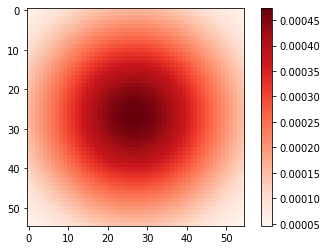

Kernel shape:  (55, 55)


In [17]:
kernel = gaussian2D(55, 55/3)
plot_kernel(kernel)

In [6]:
img = img_as_float(imread("kayak.jpg"))
print("Image shape:", img.shape)
print("Max pixel value:", img.max()) #check if properly normalized

Image shape: (476, 476, 3)
Max pixel value: 0.984313725490196


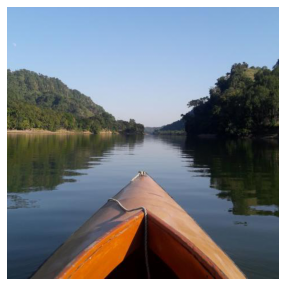

Image shape:  (476, 476, 3)


In [7]:
plot_image(img)

# Linear filtering

## *grayscale* image

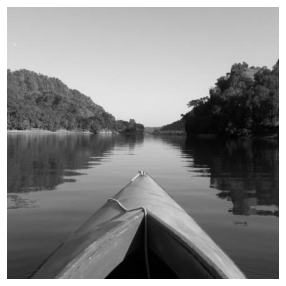

Image shape:  (476, 476)


In [10]:
## IMPORT & PLOT IMAGE

img = rgb2gray(imread("kayak.jpg"))
plot_image(img)

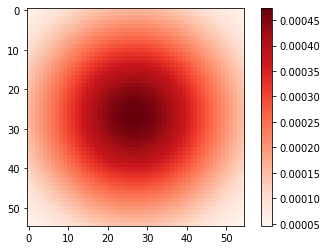

Kernel shape:  (55, 55)


In [11]:
## DEFINE & PLOT KERNEL

# kernel shape (k, k). k should be odd
k = 55

# spread for gaussian, spread > 1
spread = k/3 # or define manually

# When applying a kernel, image shape changes
# i.e. (H, W) on (k, k)
# Ho = (H + 2p - k) / s. 
# Wo = (W + 2p - k) / s. 
# p = number of pixels to be added, s = stride / step by which kernel is moved
# calculate pad width from (k-1) / 2
pad_width = int((k-1)/2)

# define either a box kernel or a gaussian kernel by calling the pre defined functions
kernel = gaussian2D(k, spread)
# kernel = box_kernel(size=k)
plot_kernel(kernel)

In [ ]:
# padding is done to ensure same size of input and output
# so padding is done first

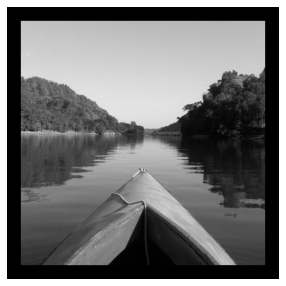

Image shape:  (530, 530)


In [18]:
# pad image 
img_zero_padded = np.pad(img, pad_width=pad_width, mode="constant", constant_values=0)

plot_image(img_zero_padded)


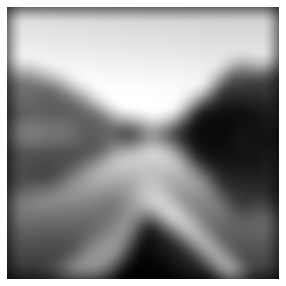

Image shape:  (476, 476)


In [23]:
# filter img with kernel via correlation
img_filtered = signal.correlate(img_zero_padded, kernel, mode='valid', method='auto') # experiment with method="direct" 

plot_image(img_filtered)

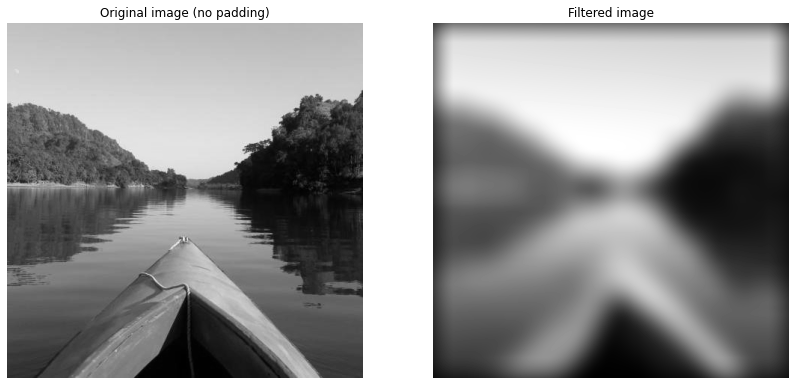

In [21]:
#Multiple plots using pyplot
fig = plt.figure(figsize=(14, 7))

ax1 = fig.add_subplot(1,2,1)
ax1.imshow(img, cmap="gray") 
ax1.title.set_text('Original image (no padding)')
ax1.axis("off")

ax2 = fig.add_subplot(1,2,2)
ax2.imshow(img_filtered, cmap="gray")
ax2.title.set_text('Filtered image')
ax2.axis("off")

plt.show()

## *color* image

In [24]:
img = imread("kayak.jpg")
# plot_image(img)

In [25]:
# kernel shape (k, k). k should be odd
k = 25

# spread for gaussian, spread > 1
spread = 8 # or define manually

# calculate pad width from (k-1) / 2
pad_width = int((k-1)/2)

# define kernel
kernel = gaussian2D(k, spread)
# kernel = box_kernel(size=k)
# plot_kernel(kernel)

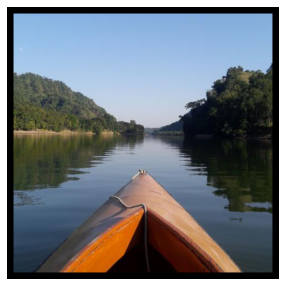

Image shape:  (500, 500, 3)


In [28]:
# pad image. Padding on x and y axis but not in z.

img_zero_padded = np.pad(img, pad_width=[(pad_width, pad_width),(pad_width, pad_width),(0, 0)], mode="constant", constant_values=0)
plot_image(img_zero_padded)

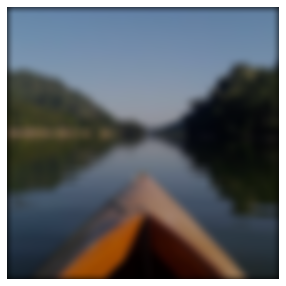

Image shape:  (476, 476, 3)


In [31]:
# filter img with kernel via correlation
img_filtered = np.zeros_like(img)

for i in range(img_zero_padded.shape[-1]):
  img_filtered[:,:,i] = signal.correlate(img_zero_padded[:,:,i], kernel, mode='valid', method='auto') # experiment with method="direct", took 4m40s for me

plot_image(img_filtered)

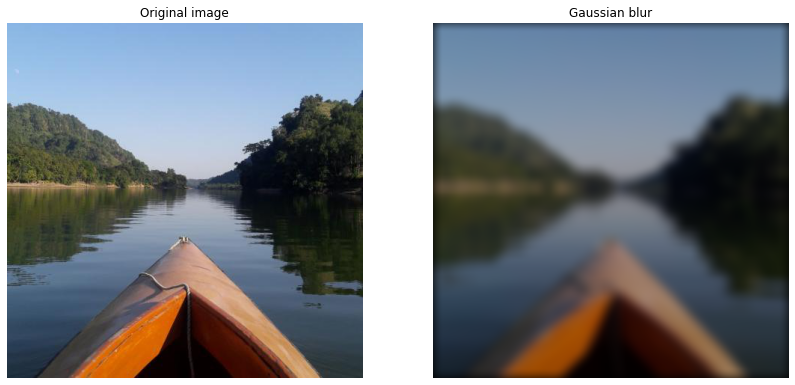

In [32]:
#Multiple plots using pyplot
fig = plt.figure(figsize=(14, 7))

ax1 = fig.add_subplot(1,2,1)
ax1.imshow(img) 
ax1.title.set_text('Original image')
ax1.axis("off")

ax2 = fig.add_subplot(1,2,2)
ax2.imshow(img_filtered)
ax2.title.set_text('Gaussian blur')
ax2.axis("off")

plt.show()

## Effect of increasing the kernel size

In [35]:
k_all = [20, 55, 205]
# np.zeros_like returns a array with zero
filtered_img_all_box = np.stack((np.zeros_like(img),)*len(k_all), axis=-1)

spread = 9

for i, k_unique in enumerate(k_all):
  # kernel = gaussian_kernel(spread, size=k_unique)
  kernel = box_kernel(size=k_unique)
  for j in range(img.shape[-1]):
    filtered_img_all_box[:,:,j, i] = signal.correlate(img[:,:,j], kernel, mode='same', method='auto')

filtered_img_all_gaussian = np.stack((np.zeros_like(img),)*len(k_all), axis=-1)

for i, k_unique in enumerate(k_all):
  kernel = gaussian2D(k_unique, spread)
  # kernel = box_kernel(size=k_unique)
  for j in range(img.shape[-1]):
    filtered_img_all_gaussian[:,:,j, i] = signal.correlate(img[:,:,j], kernel, mode='same', method='auto')

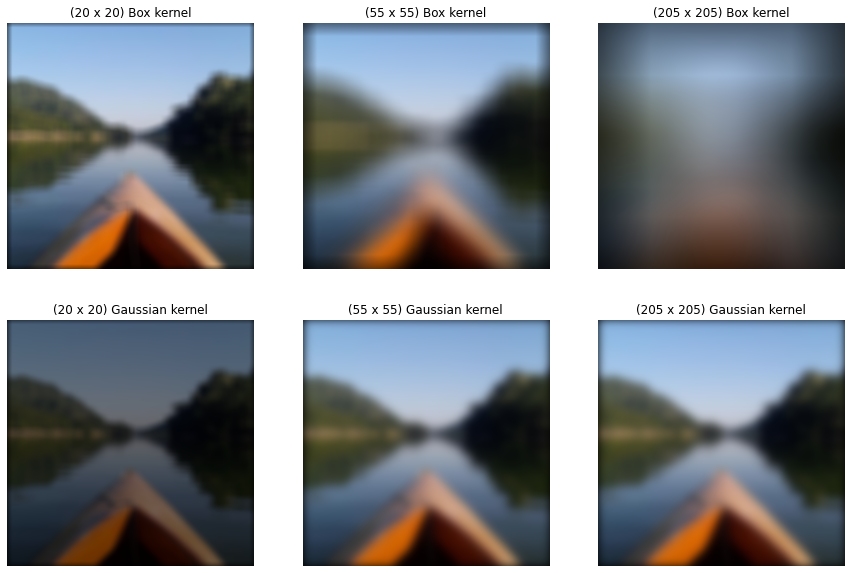

In [36]:
# Big kernel = More variation
fig = plt.figure(figsize=(15, 10))

ax1 = fig.add_subplot(2,3,1)
ax1.imshow(filtered_img_all_box[:,:,:,0]) 
ax1.title.set_text('(20 x 20) Box kernel')
ax1.axis("off")

ax2 = fig.add_subplot(2,3,2)
ax2.imshow(filtered_img_all_box[:,:,:,1])
ax2.title.set_text('(55 x 55) Box kernel')
ax2.axis("off")

ax3 = fig.add_subplot(2,3,3)
ax3.imshow(filtered_img_all_box[:,:,:,2])
ax3.title.set_text('(205 x 205) Box kernel')
ax3.axis("off")

ax4 = fig.add_subplot(2,3,4)
ax4.imshow(filtered_img_all_gaussian[:,:,:,0]) 
ax4.title.set_text('(20 x 20) Gaussian kernel')
ax4.axis("off")

ax5 = fig.add_subplot(2,3,5)
ax5.imshow(filtered_img_all_gaussian[:,:,:,1])
ax5.title.set_text('(55 x 55) Gaussian kernel')
ax5.axis("off")

ax6 = fig.add_subplot(2,3,6)
ax6.imshow(filtered_img_all_gaussian[:,:,:,2])
ax6.title.set_text('(205 x 205) Gaussian kernel')
ax6.axis("off")

plt.show()

# De-noising

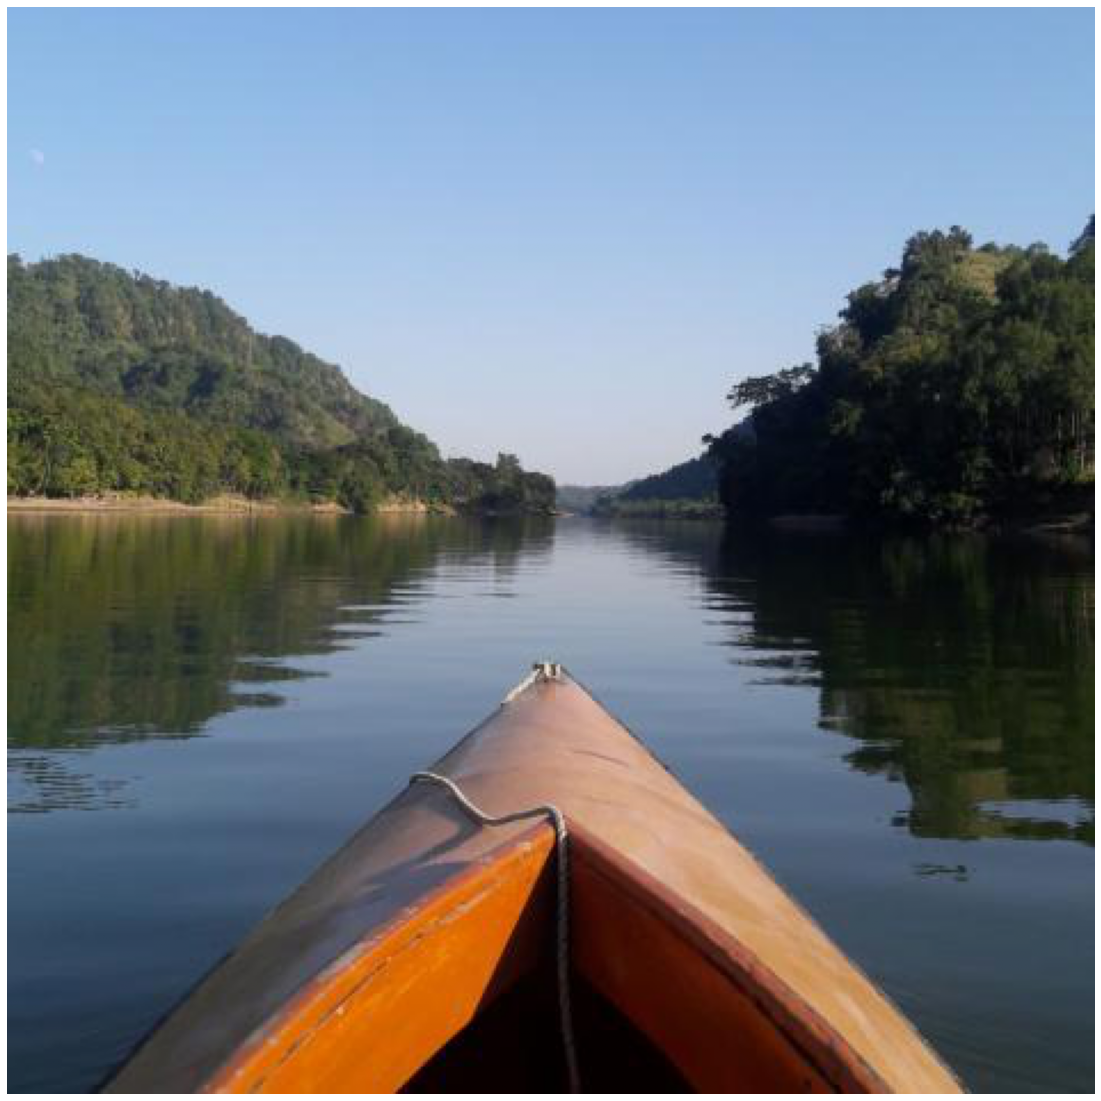

Image shape:  (476, 476, 3)


In [37]:
img = img_as_float(imread("kayak.jpg"))
plot_image(img, figsize=(20,20))

In [38]:
noisy_image_gaussian = random_noise(img, mode='gaussian', var=0.01)
plot_image(noisy_image_gaussian, figsize=(20,20))

Output hidden; open in https://colab.research.google.com to view.

In [39]:
# define kernel
# kernel shape (k, k). k should be odd
k = 25

# spread for gaussian, spread > 1
spread = k/10
kernel = gaussian2D(k, spread)
# kernel = box_kernel(size=k)
# plot_kernel(kernel)

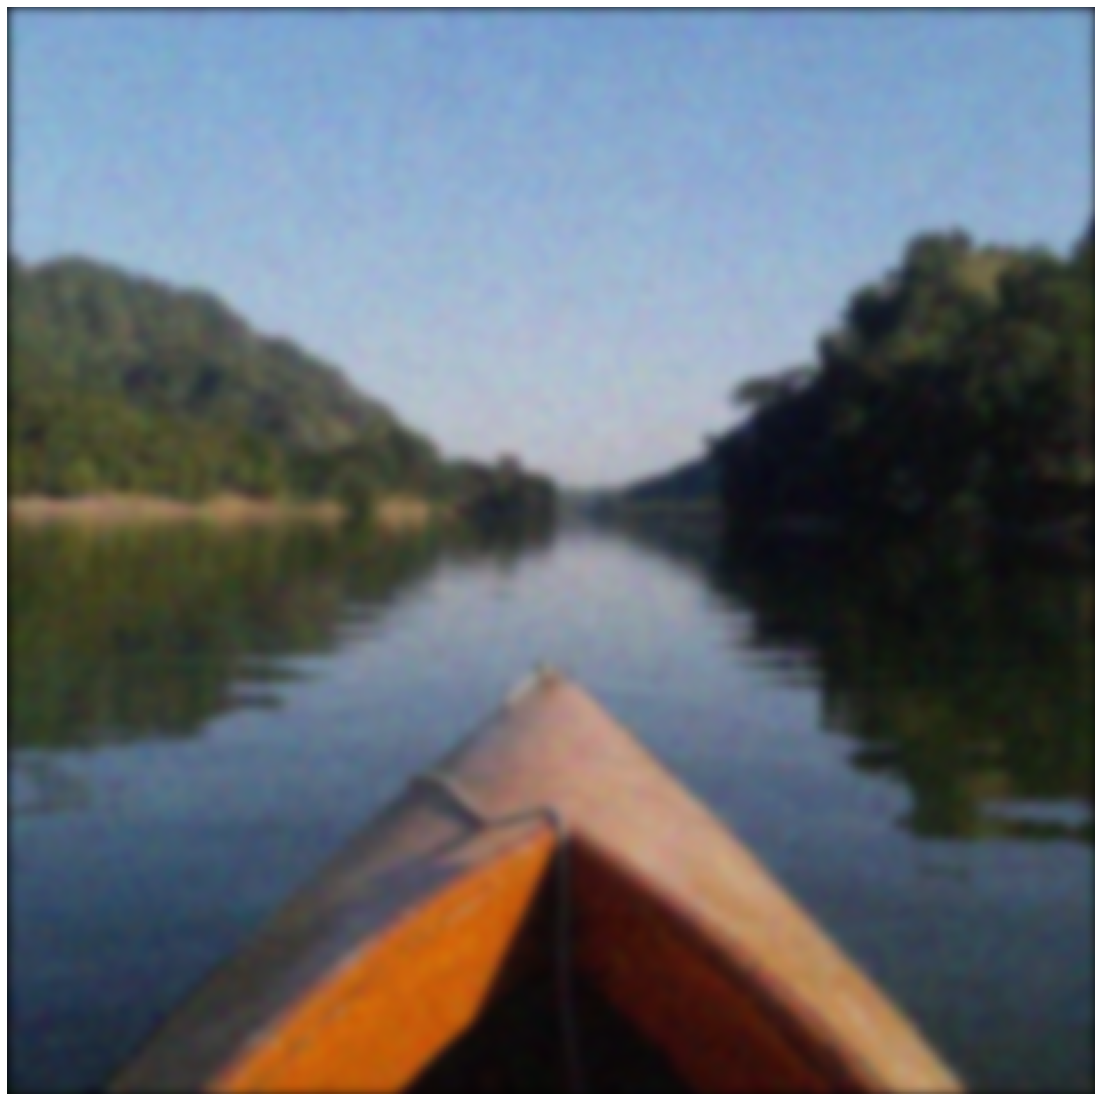

Image shape:  (476, 476, 3)


In [40]:
img_filtered = np.zeros_like(img)

for i in range(img.shape[-1]):
  img_filtered[:,:,i] = signal.correlate(noisy_image_gaussian[:,:,i], kernel, mode='same', method='auto') 

plot_image(img_filtered, figsize=(20,20))

## Gradient Based Edge Detection: The Sobel Operator

In [ ]:
# Edge: Sharp transition
# To find edge, find rate of change of intensity

In [41]:
from skimage.filters import sobel_v, sobel_h, sobel

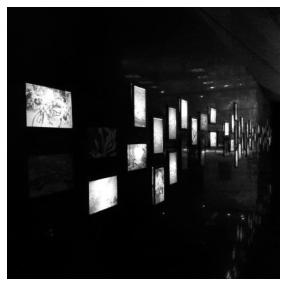

Image shape:  (442, 443)


In [42]:
img = rgb2gray(imread("boxes.jpg"))
plot_image(img)

In [43]:
img_v_edges = sobel_v(img) # vertical (Y) edges look more prominent
img_h_edges = sobel_h(img) # horizontal (x) edges look more prominent
img_edges = sobel(img)

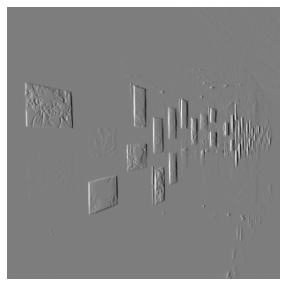

Image shape:  (442, 443)


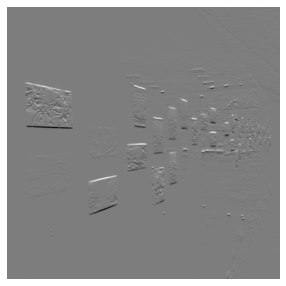

Image shape:  (442, 443)


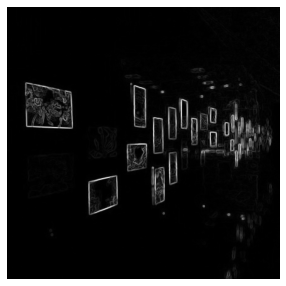

Image shape:  (442, 443)


In [44]:
plot_image(img_v_edges)
plot_image(img_h_edges)
plot_image(img_edges)

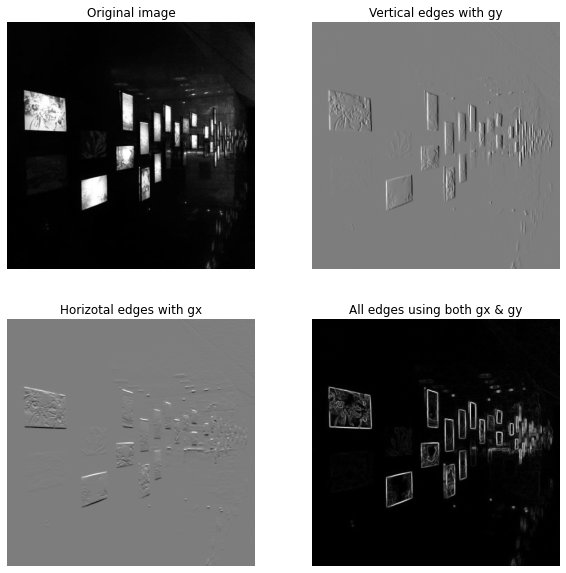

In [45]:
fig = plt.figure(figsize=(10, 10))

ax1 = fig.add_subplot(2,2,1)
ax1.imshow(img, cmap="gray") 
ax1.title.set_text('Original image')
ax1.axis("off")

ax2 = fig.add_subplot(2,2,2)
ax2.imshow(img_v_edges, cmap="gray")
ax2.title.set_text('Vertical edges with gy')
ax2.axis("off")

ax3 = fig.add_subplot(2,2,3)
ax3.imshow(img_h_edges, cmap="gray")
ax3.title.set_text('Horizotal edges with gx')
ax3.axis("off")

ax4 = fig.add_subplot(2,2,4)
ax4.imshow(img_edges, cmap="gray") 
ax4.title.set_text('All edges using both gx & gy')
ax4.axis("off")

plt.show()

## Laplacian Edge Detection & Sharpening

In [ ]:
# Better to detect edge
# 

In [46]:
from skimage.filters import laplace

In [47]:
img = rgb2gray(imread("cat.jpg"))

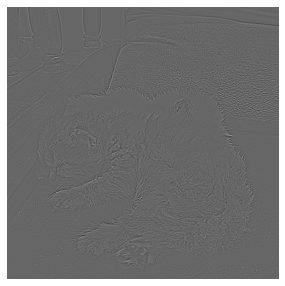

Image shape:  (443, 442)


In [48]:
# # defining a kernel manually and 2D correlation approach

# laplace_kernel = np.array([[0, 1, 0],
#                            [1,-4, 1],
#                            [0, 1, 0]])
# img_edges_laplace = signal.correlate(img, laplace_kernel, mode='same', method='auto')

# using skimage laplace filter

img_edges_laplace = laplace(img, ksize=3)
plot_image(img_edges_laplace)

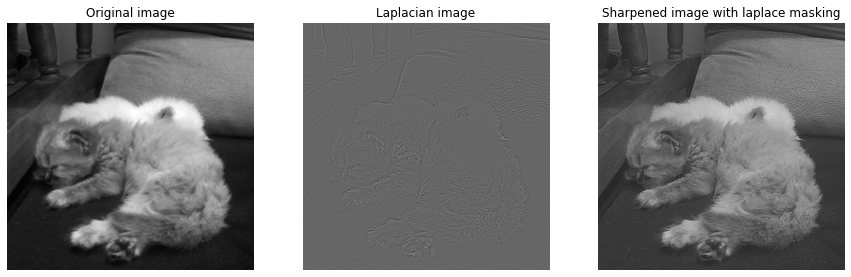

In [49]:
fig = plt.figure(figsize=(15, 5))

ax1 = fig.add_subplot(1,3,1)
ax1.imshow(img, cmap="gray") 
ax1.title.set_text('Original image')
ax1.axis("off")

ax2 = fig.add_subplot(1,3,2)
ax2.imshow(img_edges_laplace, cmap="gray")
ax2.title.set_text('Laplacian image')
ax2.axis("off")

ax3 = fig.add_subplot(1,3,3)
ax3.imshow(img+img_edges_laplace, cmap="gray")
ax3.title.set_text('Sharpened image with laplace masking')
ax3.axis("off")

plt.show()